# Importing necessary Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow import keras
from tensorflow.keras.models import Sequential , Model
import os

# Defining Function to open and vectorize the pixel image in Folder


In [ ]:
IMG_WIDTH=600
IMG_HEIGHT=600

def create_dataset(img_folder,a):
  img_data_array=[]
  class_name=[]
  for file in os.listdir(img_folder):
      image_path=os.path.join(img_folder,file)
      image=np.array(Image.open(image_path))
      image=np.resize(image,(IMG_HEIGHT,IMG_WIDTH,3))
      image=image.astype('float32')
      image/=255
      img_data_array.append(image)
      class_name.append(a)
  return img_data_array,class_name 

# Passing path of all the four folders in the function create_dataset

In [ ]:
roadtp="/content/drive/MyDrive/train_road"
train_road,labelrt=create_dataset(roadtp,0)

In [ ]:
#Thus running similarly for train_veh


In [ ]:
vehtp="/content/drive/MyDrive/test_veh"
train_veh,labelvt=create_dataset(vehtp,1)
roadte="/content/drive/MyDrive/test_road"
test_road,labelrte=create_dataset(roadte,0)
vehte="/content/drive/MyDrive/test_veh"
test_veh,labelvte=create_dataset(vehte,1) 


# Converting them has numpy array for model training

In [ ]:

#For images
train_road=np.array(train_road)
train_veh=np.array(train_veh)
test_road=np.array(test_road)
test_veh=np.array(test_veh)

#For corresponding labels
labelrt=np.array(labelrt)
labelvt=np.array(labelvt)
labelrte=np.array(labelrte) 
labelvte=np.array(labelvte)




# Creating train and test dataset for fitting in the CNN Model

In [ ]:

train_data=np.append(train_road,train_veh,axis=0)
train_label=np.append(labelrt,labelvt,axis=0)

test_data=np.append(test_road,test_veh,axis=0)
test_label=np.append(labelrte,labelvte,axis=0) 

In [ ]:
test_label

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

# Model Architecture

In [ ]:
model=keras.Sequential([
                        keras.layers.AveragePooling2D(6,3,input_shape=(600,600,3)),
                        keras.layers.Conv2D(64,3,activation='relu',input_shape=(600,600,3)),
                        keras.layers.Conv2D(32,3,activation='relu'),
                        keras.layers.MaxPool2D(2,2),
                        keras.layers.Dropout(0.5),
                        keras.layers.Flatten(),
                        keras.layers.Dense(256,activation ='relu'),
                        keras.layers.Dense(128,activation='relu'),
                        keras.layers.Dense(2,activation='softmax')
])

model.compile(optimizer='adam',loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])


# Fitting and training the model

In [ ]:
h=model.fit(train_data,train_label,epochs=20,batch_size=32)

Epoch 1/20
1/1 [==============================] - 11s 11s/step - loss: 0.6689 - accuracy: 0.7500
Epoch 2/20
1/1 [==============================] - 0s 209ms/step - loss: 20.0533 - accuracy: 0.7500
Epoch 3/20
1/1 [==============================] - 0s 215ms/step - loss: 3.2505 - accuracy: 0.7500
Epoch 4/20
1/1 [==============================] - 0s 219ms/step - loss: 4.1212 - accuracy: 0.2500
Epoch 5/20
1/1 [==============================] - 0s 213ms/step - loss: 0.4681 - accuracy: 0.7500
Epoch 6/20
1/1 [==============================] - 0s 212ms/step - loss: 0.4379 - accuracy: 0.7500
Epoch 7/20
1/1 [==============================] - 0s 215ms/step - loss: 0.3635 - accuracy: 0.7500
Epoch 8/20
1/1 [==============================] - 0s 210ms/step - loss: 0.3808 - accuracy: 0.8000
Epoch 9/20
1/1 [==============================] - 0s 218ms/step - loss: 0.3280 - accuracy: 1.0000
Epoch 10/20
1/1 [==============================] - 0s 216ms/step - loss: 0.2554 - accuracy: 1.0000
Epoch 11/20
1/1 [==

In [ ]:
h.history

{'accuracy': [0.75,
  0.75,
  0.75,
  0.25,
  0.75,
  0.75,
  0.75,
  0.800000011920929,
  1.0,
  1.0,
  1.0,
  0.949999988079071,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 'loss': [0.6689366698265076,
  20.053325653076172,
  3.2505409717559814,
  4.1211748123168945,
  0.46811366081237793,
  0.43785566091537476,
  0.36345425248146057,
  0.3808289170265198,
  0.3279563784599304,
  0.25541800260543823,
  0.15897098183631897,
  0.10606776177883148,
  0.06207801029086113,
  0.02202969789505005,
  0.033863846212625504,
  0.006674651056528091,
  0.0076511092483997345,
  0.0029478748328983784,
  0.001761192106641829,
  0.001086462289094925]}

# Evaluating the accuracy for test dataset

In [ ]:
result = model.evaluate(test_data,test_label)
dict(zip(model.metrics_names, result))

1/1 [==============================] - 1s 761ms/step - loss: 8.8905e-04 - accuracy: 1.0000


{'accuracy': 1.0, 'loss': 0.0008890533936209977}

In [ ]:
def prep_image(image_path):
      image=np.array(Image.open(image_path))
      image=np.resize(image,(IMG_HEIGHT,IMG_WIDTH,3))
      image=image.astype('float32')
      image/=255
      return image

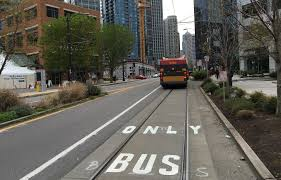

In [ ]:
from google.colab.patches import cv2_imshow
import cv2
img=cv2.imread("/content/drive/MyDrive/train_veh/I4.jfif")
cv2_imshow(img)

In [ ]:
image=prep_image("/content/drive/MyDrive/train_veh/I4.jfif")

In [ ]:
image.shape

(600, 600, 3)

In [ ]:
image=np.array([image])
image.shape

(1, 600, 600, 3)

In [ ]:
model.predict(image)

array([[0.00437086, 0.9956292 ]], dtype=float32)

In [ ]:
#The above picture is thus predicted to be a vehicle 


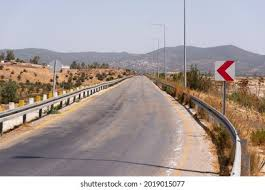

In [ ]:
image=cv2.imread("/content/drive/MyDrive/train_road/Img12.jfif")
cv2_imshow(image)

In [ ]:
image=prep_image("/content/drive/MyDrive/train_road/Img12.jfif")
image.shape

(600, 600, 3)

In [ ]:
image=np.array([image])
image.shape

(1, 600, 600, 3)

In [ ]:
model.predict(image)

array([[1.0000000e+00, 5.2322613e-09]], dtype=float32)

In [ ]:
#Thus the above is predicted as a Road 

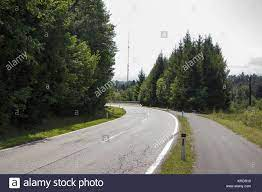

In [ ]:
image=cv2.imread("/content/drive/MyDrive/train_road/Img4.jfif")
cv2_imshow(image)

In [ ]:
image=prep_image("/content/drive/MyDrive/train_road/Img4.jfif")
image.shape

(600, 600, 3)

In [ ]:
image=np.array([image])

In [ ]:
model.predict(image)

array([[9.9958664e-01, 4.1338170e-04]], dtype=float32)

In [ ]:
#Thus this is also predicted as road 

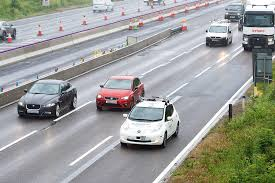

In [ ]:
image=cv2.imread("/content/drive/MyDrive/train_veh/I14.jfif")
cv2_imshow(image)

In [ ]:
image=prep_image("/content/drive/MyDrive/train_veh/I14.jfif")
image.shape

(600, 600, 3)

In [ ]:
image=np.array([image])
image.shape

(1, 600, 600, 3)

In [ ]:
model.predict(image)

array([[0.07377225, 0.9262278 ]], dtype=float32)